# Exploratory Data Analysis

In [1]:
import pandas as pd
import os

# Directory containing the files
directory = r'C:\Users\macke\OneDrive\Desktop\Globant Data Scientist Test'

# Define all possible columns
all_columns = [
    'TRANS DATE', 'TRANS VAT DESC', 'ORIGINAL GROSS AMT', 'ORIGINAL CUR', 
    'BILLING GROSS AMT', 'BILLING CUR CODE', 'TRANS TAX AMT', 'TRANS ORIGINAL NET AMT',
    'MERCHANT NAME', 'CARD NUMBER', 'TRANS CAC CODE 1', 'TRANS CAC DESC 1',
    'TRANS CAC CODE 2', 'TRANS CAC DESC 2', 'TRANS CAC CODE 3', 'Directorate',
    'TRANS TAX DESC', 'TRANS CAC CODE 4', 'TRANS CAC CODE 5', 'TRANS CAC CODE 6',
    'TRANS CAC CODE 7', 'TRANS CAC CODE 8'
]

# List to store individual DataFrames
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".xls") or filename.endswith(".xlsx"):
        file_path = os.path.join(directory, filename)
        if filename.endswith(".xls"):
            df = pd.read_excel(file_path, engine='xlrd')  
        else:
            df = pd.read_excel(file_path, engine='openpyxl')  
        
        # Align the DataFrame to the template
        df = df.reindex(columns=all_columns)
        dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
print(combined_df.head())
print(combined_df.shape)


  TRANS DATE TRANS VAT DESC  ORIGINAL GROSS AMT ORIGINAL CUR  \
0 2017-01-03             VR               72.61          GBP   
1 2017-01-24             VR               85.51          GBP   
2 2017-02-01             VR               10.09          GBP   
3 2017-01-04             VR               20.00          GBP   
4 2017-01-05             VR               50.00          GBP   

   BILLING GROSS AMT BILLING CUR CODE  TRANS TAX AMT  TRANS ORIGINAL NET AMT  \
0              72.61              GBP            NaN                     NaN   
1              85.51              GBP            NaN                     NaN   
2              10.09              GBP            NaN                     NaN   
3              20.00              GBP            NaN                     NaN   
4              50.00              GBP            NaN                     NaN   

        MERCHANT NAME       CARD NUMBER  ... TRANS CAC CODE 2  \
0     shell kings 587  ************5770  ...            RV12N   
1  s

C:\Users\macke\AppData\Local\Temp\ipykernel_20680\220899484.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dfs, ignore_index=True)


In [2]:
import pandas as pd

# read the combined dataset
Data = pd.read_csv('combined_dataset.csv')

# Ensure correct data types
Data['TRANS DATE'] = pd.to_datetime(Data['TRANS DATE'])

# Extract date features
Data['Year'] = Data['TRANS DATE'].dt.year
Data['Month'] = Data['TRANS DATE'].dt.month
Data['Day'] = Data['TRANS DATE'].dt.day

# Display the first few rows to verify
print(Data.head())


C:\Users\macke\AppData\Local\Temp\ipykernel_20680\1392958219.py:4: DtypeWarning: Columns (3,5,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('combined_dataset.csv')


  TRANS DATE TRANS VAT DESC  ORIGINAL GROSS AMT ORIGINAL CUR  \
0 2017-01-03             VR               72.61          GBP   
1 2017-01-24             VR               85.51          GBP   
2 2017-02-01             VR               10.09          GBP   
3 2017-01-04             VR               20.00          GBP   
4 2017-01-05             VR               50.00          GBP   

   BILLING GROSS AMT BILLING CUR CODE  TRANS TAX AMT  TRANS ORIGINAL NET AMT  \
0              72.61              GBP            NaN                     NaN   
1              85.51              GBP            NaN                     NaN   
2              10.09              GBP            NaN                     NaN   
3              20.00              GBP            NaN                     NaN   
4              50.00              GBP            NaN                     NaN   

        MERCHANT NAME       CARD NUMBER  ...          Directorate  \
0     shell kings 587  ************5770  ...  Adult & Communities

In [3]:
# Generate summary statistics
summary_stats = Data.describe()
print(summary_stats)


                          TRANS DATE  ORIGINAL GROSS AMT  BILLING GROSS AMT  \
count                         458485        4.584850e+05      299210.000000   
mean   2019-03-31 14:02:45.534750464        1.737752e+02         134.541236   
min              2013-11-12 00:00:00       -4.869801e+05     -486980.090000   
25%              2016-07-27 00:00:00        1.434000e+01          15.000000   
50%              2019-02-11 00:00:00        4.326000e+01          45.130000   
75%              2022-01-05 00:00:00        9.521000e+01          98.770000   
max              2024-07-03 00:00:00        3.920000e+06       65180.800000   
std                              NaN        8.293025e+03        1090.286324   

       TRANS TAX AMT  TRANS ORIGINAL NET AMT           Year          Month  \
count  193096.000000            1.586110e+05  458485.000000  458485.000000   
mean        9.001189            2.065557e+02    2018.753492       6.457976   
min      -760.000000           -1.699230e+04    2013.0

TRANS DATE                  4462
TRANS VAT DESC            236195
ORIGINAL GROSS AMT          4462
ORIGINAL CUR              140067
BILLING GROSS AMT         163737
BILLING CUR CODE          113876
TRANS TAX AMT             269851
TRANS ORIGINAL NET AMT    304336
MERCHANT NAME               8793
CARD NUMBER                 4462
TRANS CAC CODE 1            4947
TRANS CAC DESC 1          103754
TRANS CAC CODE 2            6056
TRANS CAC DESC 2          101745
TRANS CAC CODE 3           29219
Directorate                81612
TRANS TAX DESC            245574
TRANS CAC CODE 4          359061
TRANS CAC CODE 5          359106
TRANS CAC CODE 6          359108
TRANS CAC CODE 7          359081
TRANS CAC CODE 8          359092
Year                        4462
Month                       4462
Day                         4462
dtype: int64


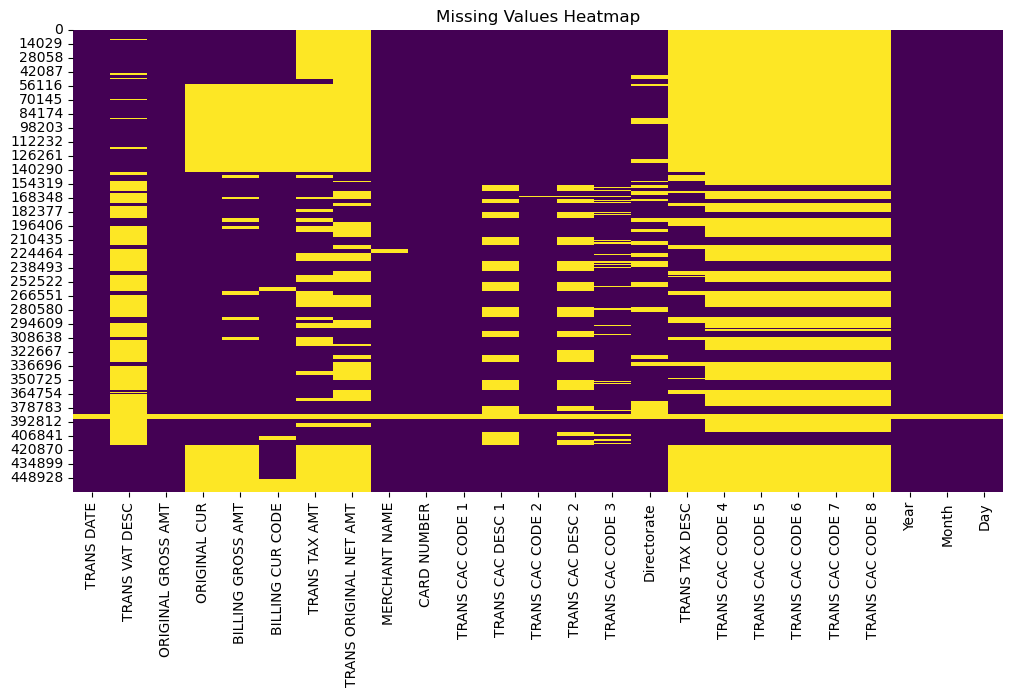

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_values = Data.isnull().sum()
print(missing_values)

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(Data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [5]:
# Drop columns with more than 70% missing values
threshold = 70
missing_percentage = Data.isnull().sum() / len(Data) * 100
columns_to_drop = missing_percentage[missing_percentage > threshold].index
Data.drop(columns=columns_to_drop, inplace=True)

# Recalculate missing values after dropping columns
missing_percentage_after_dropping_columns = Data.isnull().sum() / len(Data) * 100
print(missing_percentage_after_dropping_columns)


TRANS DATE                 0.963825
TRANS VAT DESC            51.019879
ORIGINAL GROSS AMT         0.963825
ORIGINAL CUR              30.255515
BILLING GROSS AMT         35.368412
BILLING CUR CODE          24.598064
TRANS TAX AMT             58.289826
TRANS ORIGINAL NET AMT    65.738843
MERCHANT NAME              1.899353
CARD NUMBER                0.963825
TRANS CAC CODE 1           1.068589
TRANS CAC DESC 1          22.411637
TRANS CAC CODE 2           1.308141
TRANS CAC DESC 2          21.977678
TRANS CAC CODE 3           6.311522
Directorate               17.628800
TRANS TAX DESC            53.045813
Year                       0.963825
Month                      0.963825
Day                        0.963825
dtype: float64


In [6]:
# Drop rows where 'TRANS DATE' and 'ORIGINAL GROSS AMT' are missing
Data.dropna(subset=['TRANS DATE', 'ORIGINAL GROSS AMT'], inplace=True)

# Recalculate missing values after dropping rows
missing_percentage_after_dropping_rows = Data.isnull().sum() / len(Data) * 100
print(missing_percentage_after_dropping_rows)



TRANS DATE                 0.000000
TRANS VAT DESC            50.543202
ORIGINAL GROSS AMT         0.000000
ORIGINAL CUR              29.576758
BILLING GROSS AMT         34.739414
BILLING CUR CODE          23.864249
TRANS TAX AMT             57.883900
TRANS ORIGINAL NET AMT    65.405411
MERCHANT NAME              0.944633
CARD NUMBER                0.000000
TRANS CAC CODE 1           0.105783
TRANS CAC DESC 1          21.656543
TRANS CAC CODE 2           0.347667
TRANS CAC DESC 2          21.218360
TRANS CAC CODE 3           5.399740
Directorate               16.827595
TRANS TAX DESC            52.588852
Year                       0.000000
Month                      0.000000
Day                        0.000000
dtype: float64


In [7]:
# Fill missing 'MERCHANT NAME' with 'Unknown'
Data['MERCHANT NAME'].fillna('Unknown', inplace=True)

# Identify existing categorical columns
existing_categorical_columns = [col for col in ['ORIGINAL CUR', 'BILLING CUR CODE', 'TRANS VAT DESC', 'TRANS CAC DESC 1', 'TRANS CAC DESC 2', 'Directorate'] if col in Data.columns]

# Fill missing categorical values with mode
for column in existing_categorical_columns:
    Data[column].fillna(Data[column].mode()[0], inplace=True)

# Fill missing numerical values with 0 or mean
if 'TRANS TAX AMT' in Data.columns:
    Data['TRANS TAX AMT'].fillna(0, inplace=True)
if 'BILLING GROSS AMT' in Data.columns:
    Data['BILLING GROSS AMT'].fillna(Data['BILLING GROSS AMT'].mean(), inplace=True)

# Recalculate missing values after imputation
missing_percentage_after_imputation = Data.isnull().sum() / len(Data) * 100
print(missing_percentage_after_imputation)



TRANS DATE                 0.000000
TRANS VAT DESC             0.000000
ORIGINAL GROSS AMT         0.000000
ORIGINAL CUR               0.000000
BILLING GROSS AMT          0.000000
BILLING CUR CODE           0.000000
TRANS TAX AMT              0.000000
TRANS ORIGINAL NET AMT    65.405411
MERCHANT NAME              0.000000
CARD NUMBER                0.000000
TRANS CAC CODE 1           0.105783
TRANS CAC DESC 1           0.000000
TRANS CAC CODE 2           0.347667
TRANS CAC DESC 2           0.000000
TRANS CAC CODE 3           5.399740
Directorate                0.000000
TRANS TAX DESC            52.588852
Year                       0.000000
Month                      0.000000
Day                        0.000000
dtype: float64


In [8]:
# Final check for missing values
final_missing_percentage = Data.isnull().sum() / len(Data) * 100
print(final_missing_percentage)

# Save the cleaned dataset to a CSV file
#Data.to_csv('Cleaned_Data.csv', index=False)


TRANS DATE                 0.000000
TRANS VAT DESC             0.000000
ORIGINAL GROSS AMT         0.000000
ORIGINAL CUR               0.000000
BILLING GROSS AMT          0.000000
BILLING CUR CODE           0.000000
TRANS TAX AMT              0.000000
TRANS ORIGINAL NET AMT    65.405411
MERCHANT NAME              0.000000
CARD NUMBER                0.000000
TRANS CAC CODE 1           0.105783
TRANS CAC DESC 1           0.000000
TRANS CAC CODE 2           0.347667
TRANS CAC DESC 2           0.000000
TRANS CAC CODE 3           5.399740
Directorate                0.000000
TRANS TAX DESC            52.588852
Year                       0.000000
Month                      0.000000
Day                        0.000000
dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
# Load the cleaned dataset
Data = pd.read_csv('Cleaned_Data.csv')

# Ensure correct data types
Data['TRANS DATE'] = pd.to_datetime(Data['TRANS DATE'])

# Extract date features
Data['Year'] = Data['TRANS DATE'].dt.year
Data['Month'] = Data['TRANS DATE'].dt.month
Data['Day'] = Data['TRANS DATE'].dt.day

C:\Users\macke\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


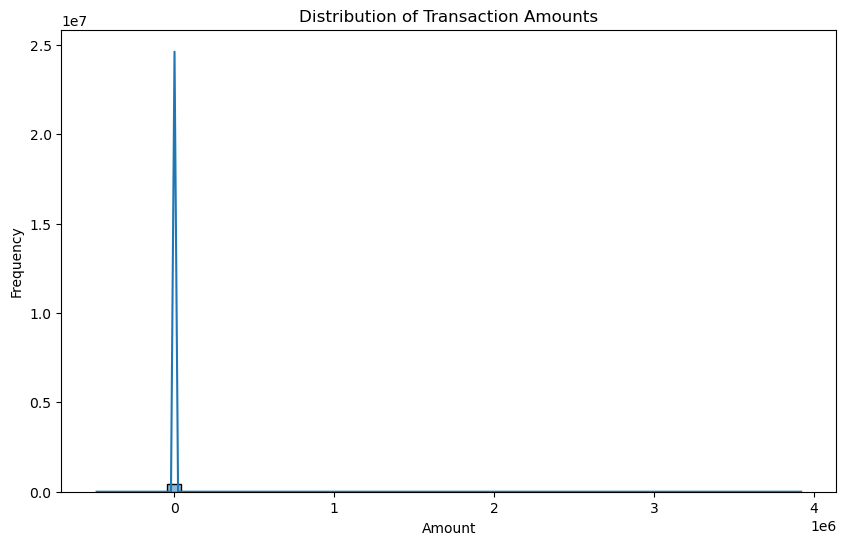

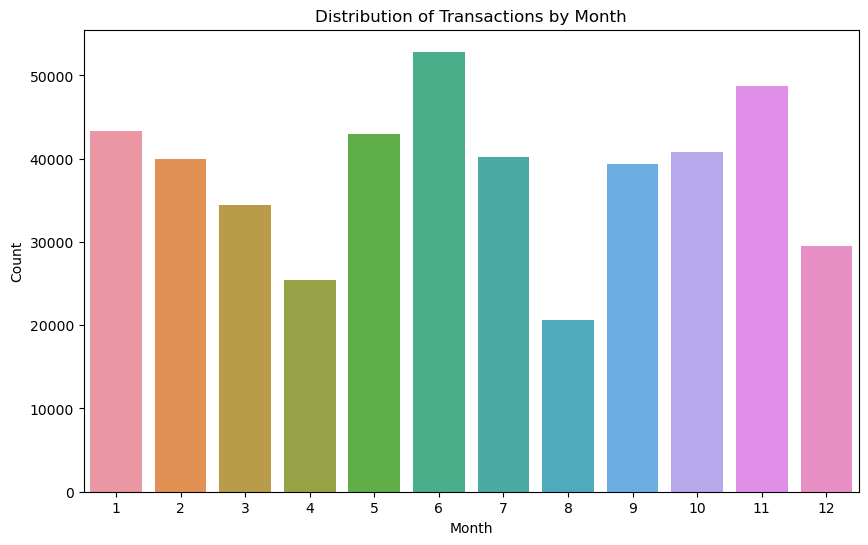

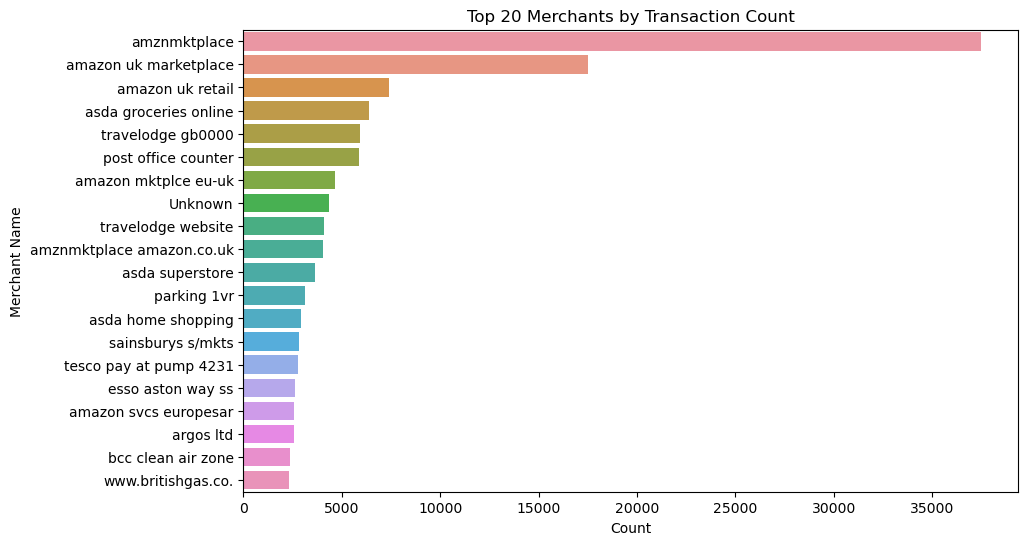

In [10]:
# Distribution of 'ORIGINAL GROSS AMT'
plt.figure(figsize=(10, 6))
sns.histplot(Data['ORIGINAL GROSS AMT'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'Month'
plt.figure(figsize=(10, 6))
sns.countplot(data=Data, x='Month')
plt.title('Distribution of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# Distribution of 'MERCHANT NAME' (top 20 merchants)
top_20_merchants = Data['MERCHANT NAME'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_merchants.values, y=top_20_merchants.index)
plt.title('Top 20 Merchants by Transaction Count')
plt.xlabel('Count')
plt.ylabel('Merchant Name')
plt.show()


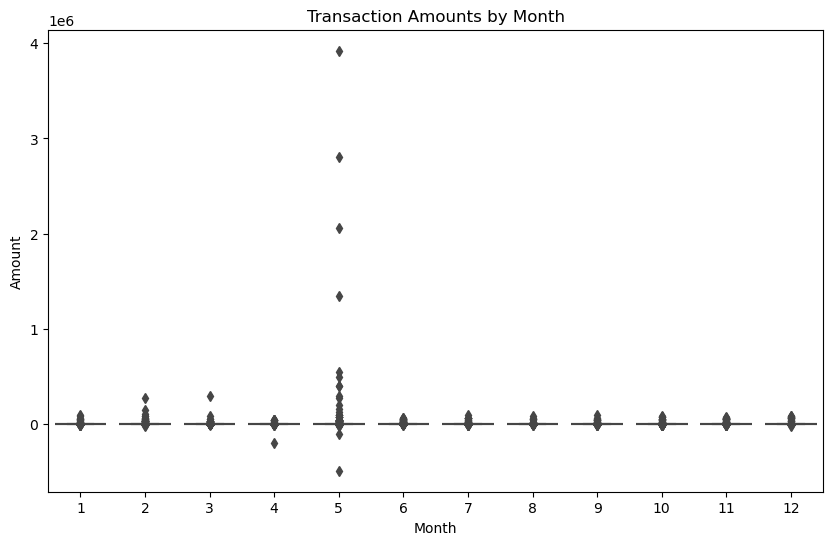

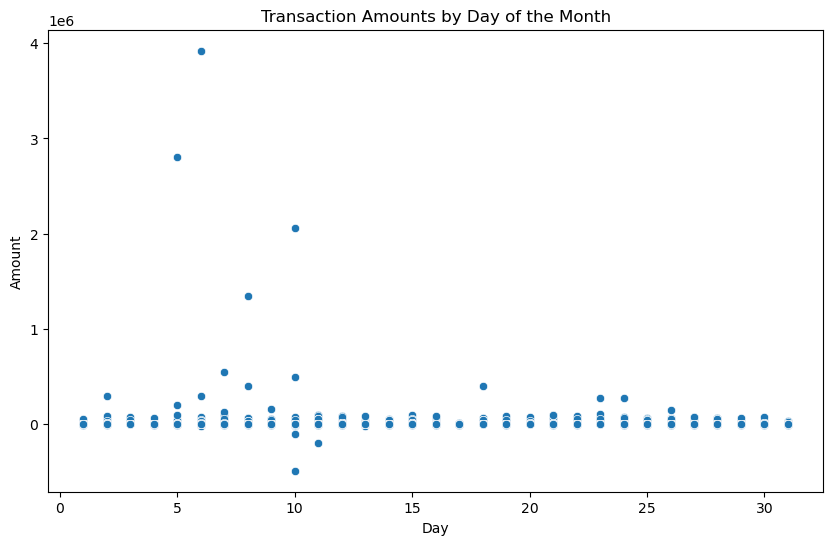

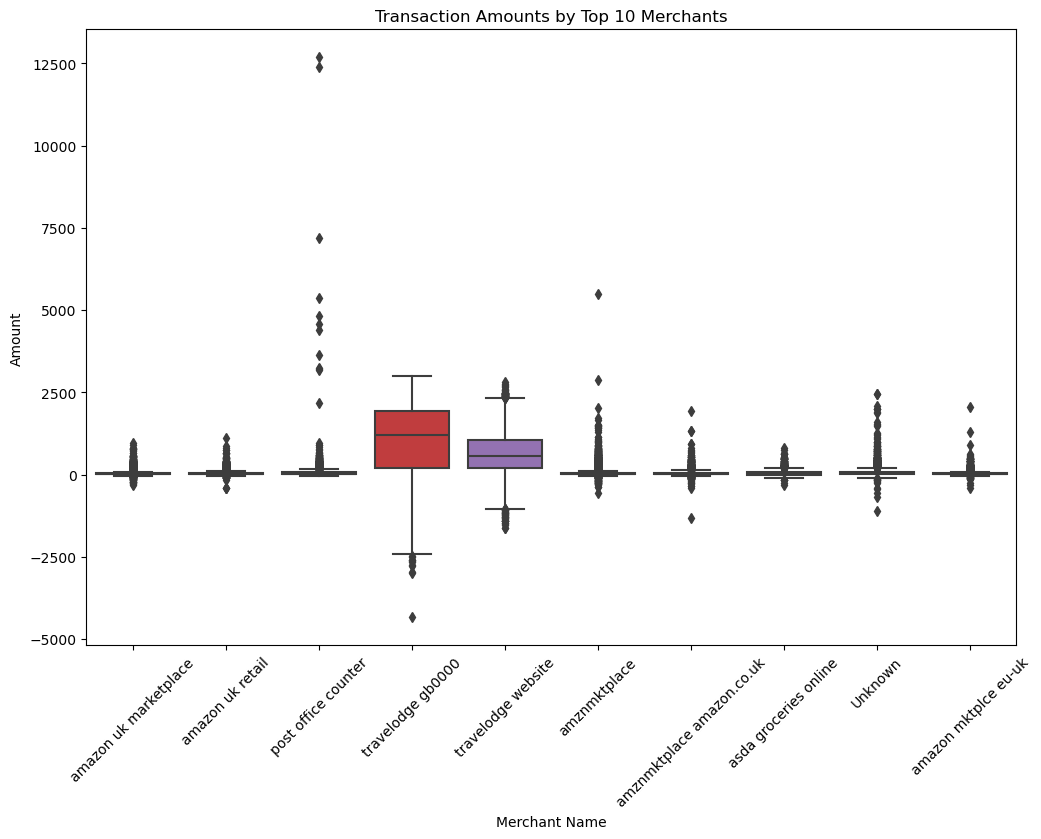

In [11]:
# Amount Transaction vs Month
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data, x='Month', y='ORIGINAL GROSS AMT')
plt.title('Transaction Amounts by Month')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()

# Amount Transaction vs Day
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data, x='Day', y='ORIGINAL GROSS AMT')
plt.title('Transaction Amounts by Day of the Month')
plt.xlabel('Day')
plt.ylabel('Amount')
plt.show()

# Amount vs Merchant Name (top 10 merchants)
top_10_merchants = Data['MERCHANT NAME'].value_counts().head(10).index
plt.figure(figsize=(12, 8))
sns.boxplot(data=Data[Data['MERCHANT NAME'].isin(top_10_merchants)], x='MERCHANT NAME', y='ORIGINAL GROSS AMT')
plt.title('Transaction Amounts by Top 10 Merchants')
plt.xlabel('Merchant Name')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


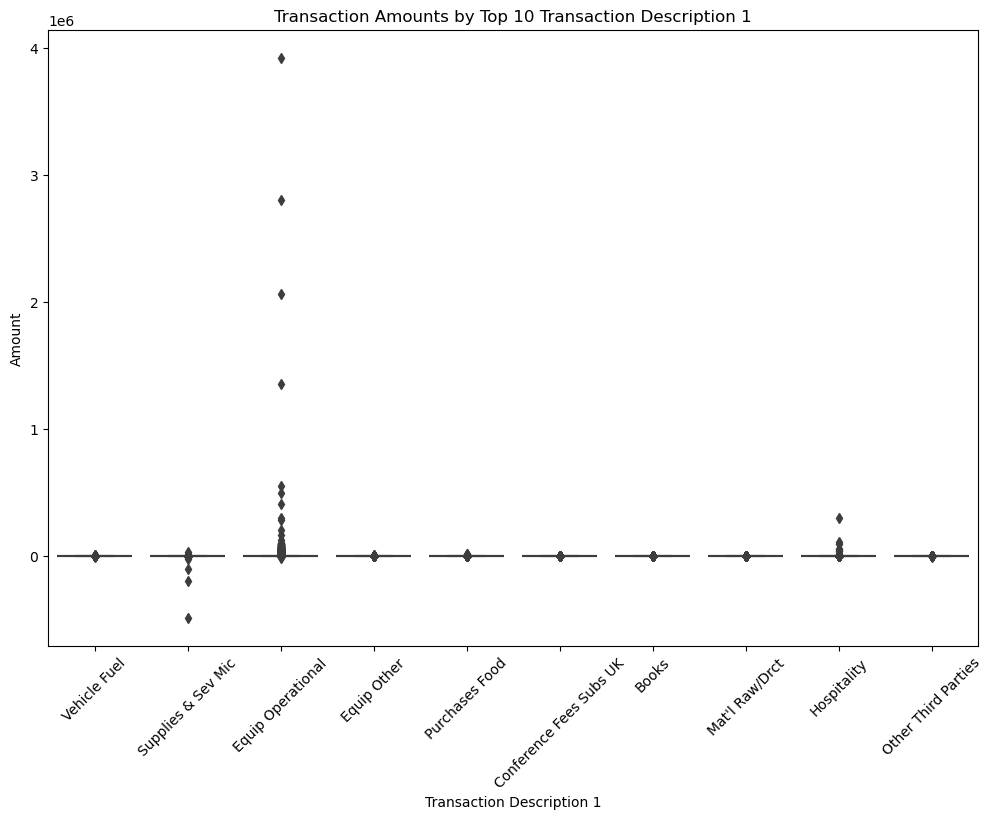

In [12]:

# Amount vs Transaction Description (top 10 Transaction Description 1)
top_10_merchants = Data['TRANS CAC DESC 1'].value_counts().head(10).index
plt.figure(figsize=(12, 8))
sns.boxplot(data=Data[Data['TRANS CAC DESC 1'].isin(top_10_merchants)], x='TRANS CAC DESC 1', y='ORIGINAL GROSS AMT')
plt.title('Transaction Amounts by Top 10 Transaction Description 1')
plt.xlabel('Transaction Description 1')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

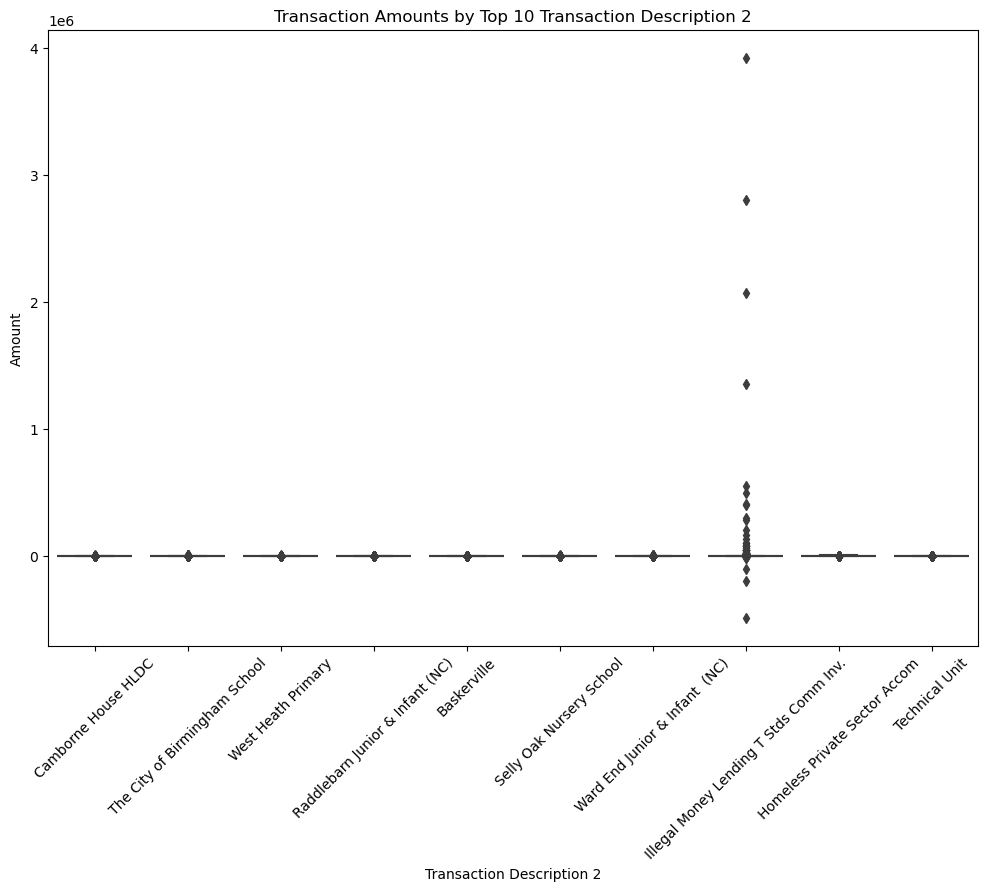

In [13]:
# Amount vs Transaction Description (top 10 Transaction Description 2)
top_10_merchants = Data['TRANS CAC DESC 2'].value_counts().head(10).index
plt.figure(figsize=(12, 8))
sns.boxplot(data=Data[Data['TRANS CAC DESC 2'].isin(top_10_merchants)], x='TRANS CAC DESC 2', y='ORIGINAL GROSS AMT')
plt.title('Transaction Amounts by Top 10 Transaction Description 2')
plt.xlabel('Transaction Description 2')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

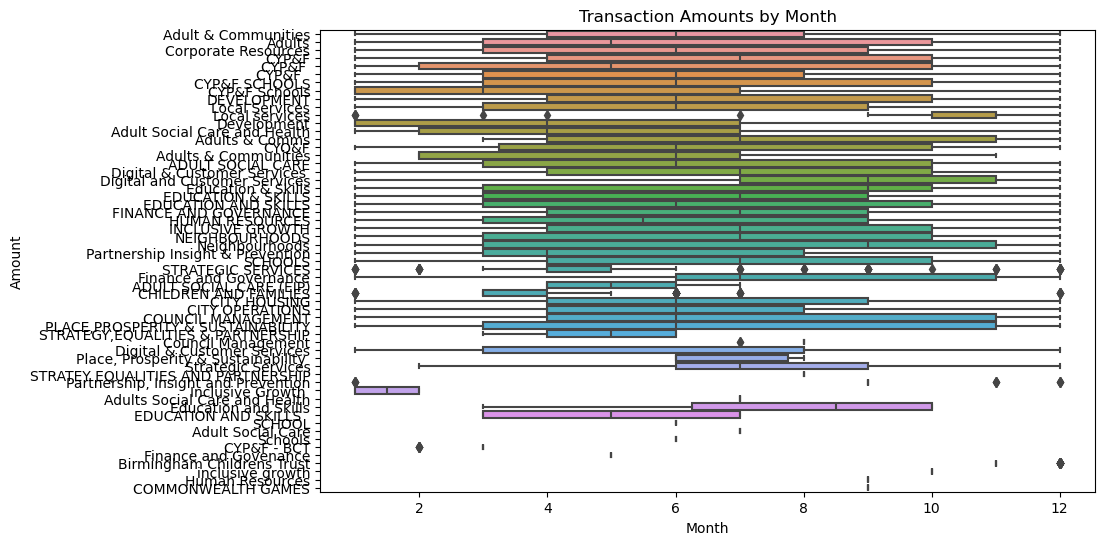

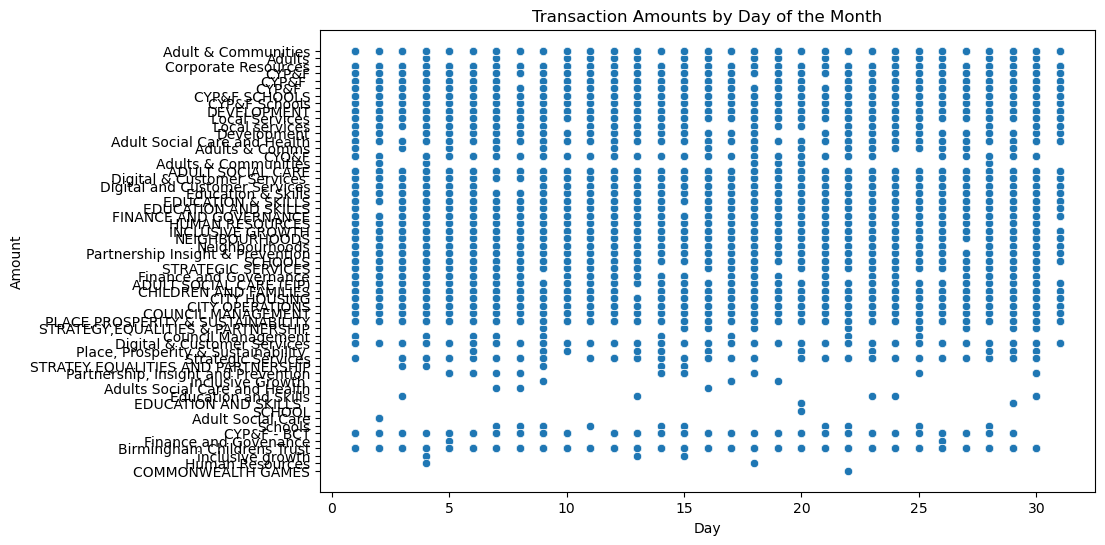

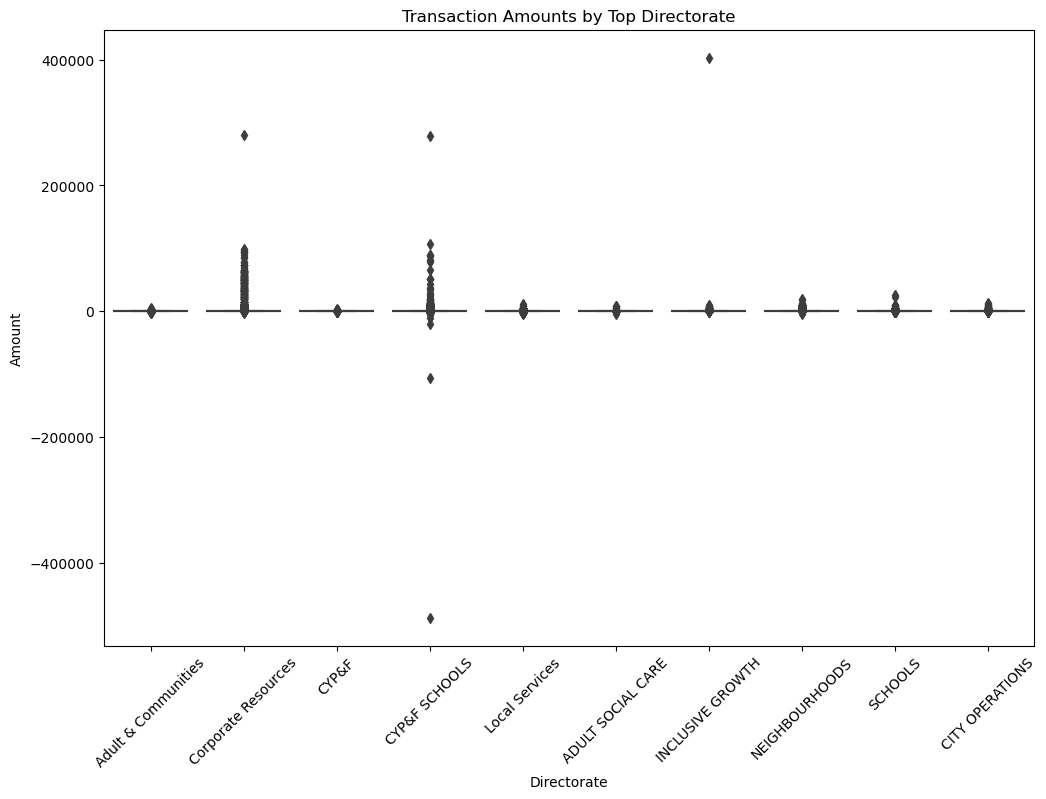

In [14]:
# Amount vs Month
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data, x='Month', y='Directorate')
plt.title('Transaction Amounts by Month')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()

# Amount vs Day
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data, x='Day', y='Directorate')
plt.title('Transaction Amounts by Day of the Month')
plt.xlabel('Day')
plt.ylabel('Amount')
plt.show()

# Amount vs Merchant Name (top 10 merchants)
top_10_merchants = Data['Directorate'].value_counts().head(10).index
plt.figure(figsize=(12, 8))
sns.boxplot(data=Data[Data['Directorate'].isin(top_10_merchants)], x='Directorate', y='ORIGINAL GROSS AMT')
plt.title('Transaction Amounts by Top Directorate')
plt.xlabel('Directorate')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

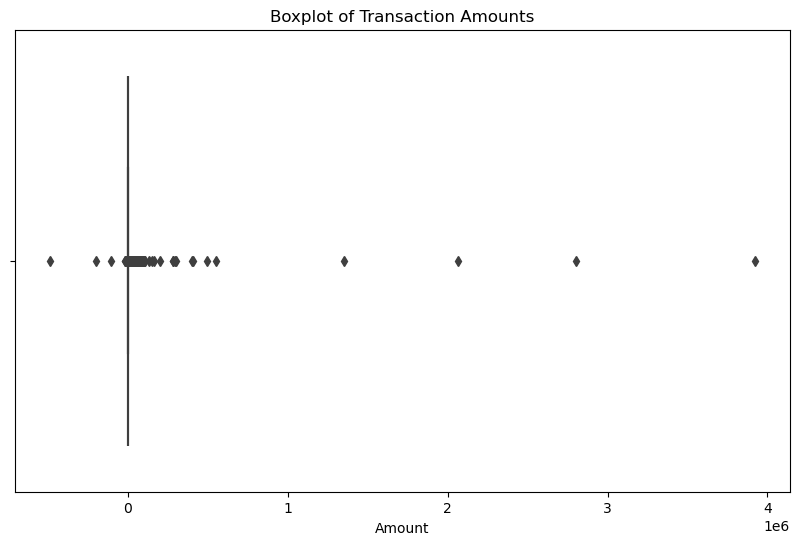

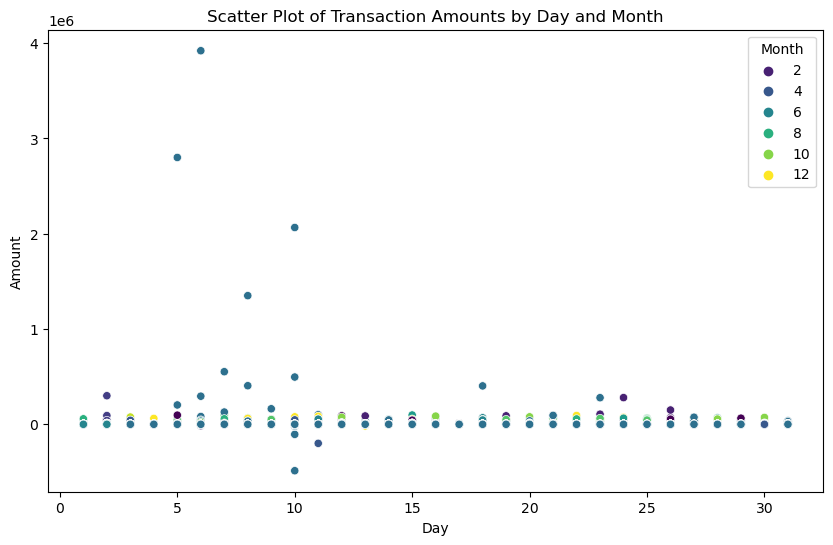

In [15]:
# Boxplot to identify outliers in 'ORIGINAL GROSS AMT'
# Anomaly detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=Data['ORIGINAL GROSS AMT'])
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

# Scatter plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data, x='Day', y='ORIGINAL GROSS AMT', hue='Month', palette='viridis')
plt.title('Scatter Plot of Transaction Amounts by Day and Month')
plt.xlabel('Day')
plt.ylabel('Amount')
plt.show()


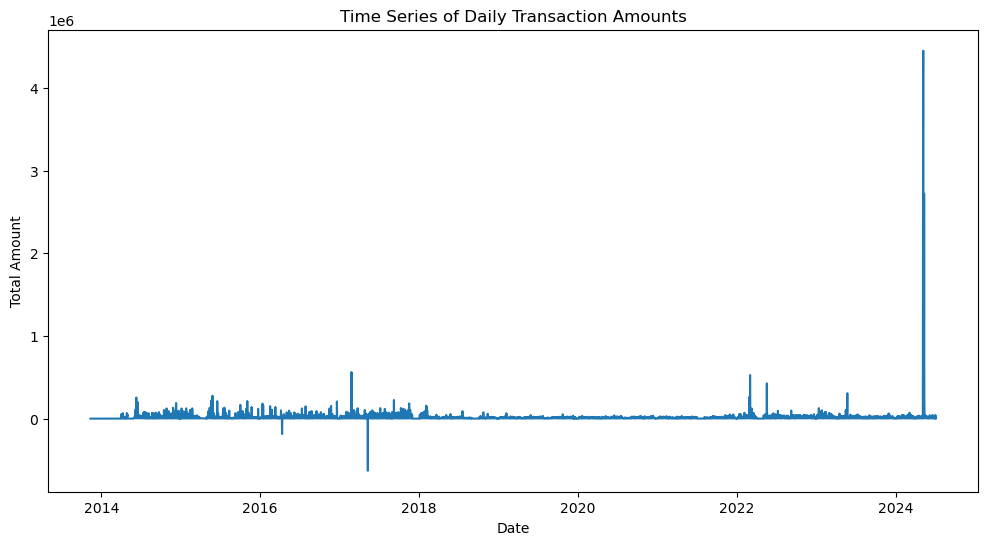

C:\Users\macke\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\macke\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


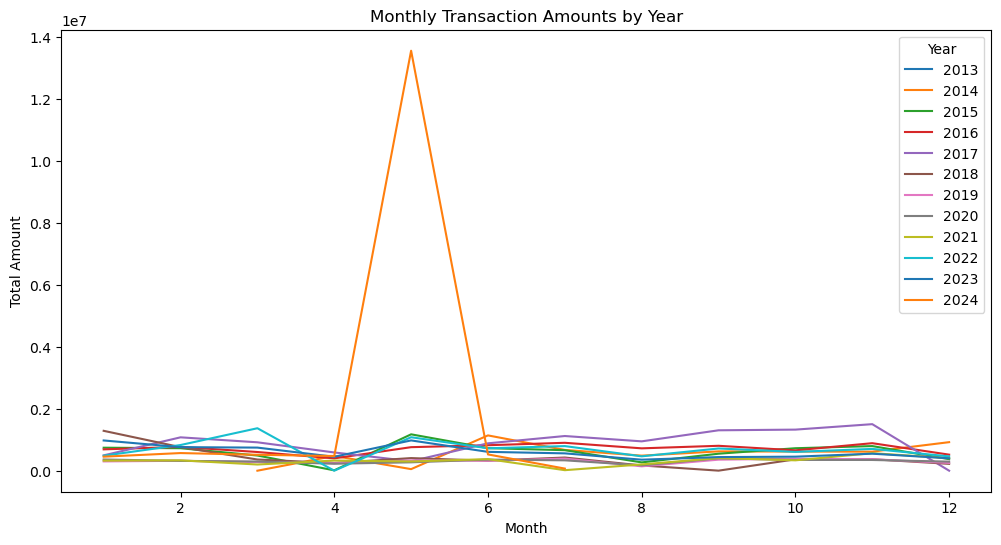

In [16]:
# Time series plot of transaction amounts
Data['TRANS DATE'] = pd.to_datetime(Data['TRANS DATE'])

# Group by date and sum amounts
daily_amounts = Data.groupby('TRANS DATE')['ORIGINAL GROSS AMT'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_amounts['TRANS DATE'], daily_amounts['ORIGINAL GROSS AMT'])
plt.title('Time Series of Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

# Monthly aggregated transaction amounts
monthly_amounts = Data.groupby(['Year', 'Month'])['ORIGINAL GROSS AMT'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_amounts, x='Month', y='ORIGINAL GROSS AMT', hue='Year', palette='tab10')
plt.title('Monthly Transaction Amounts by Year')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.show()


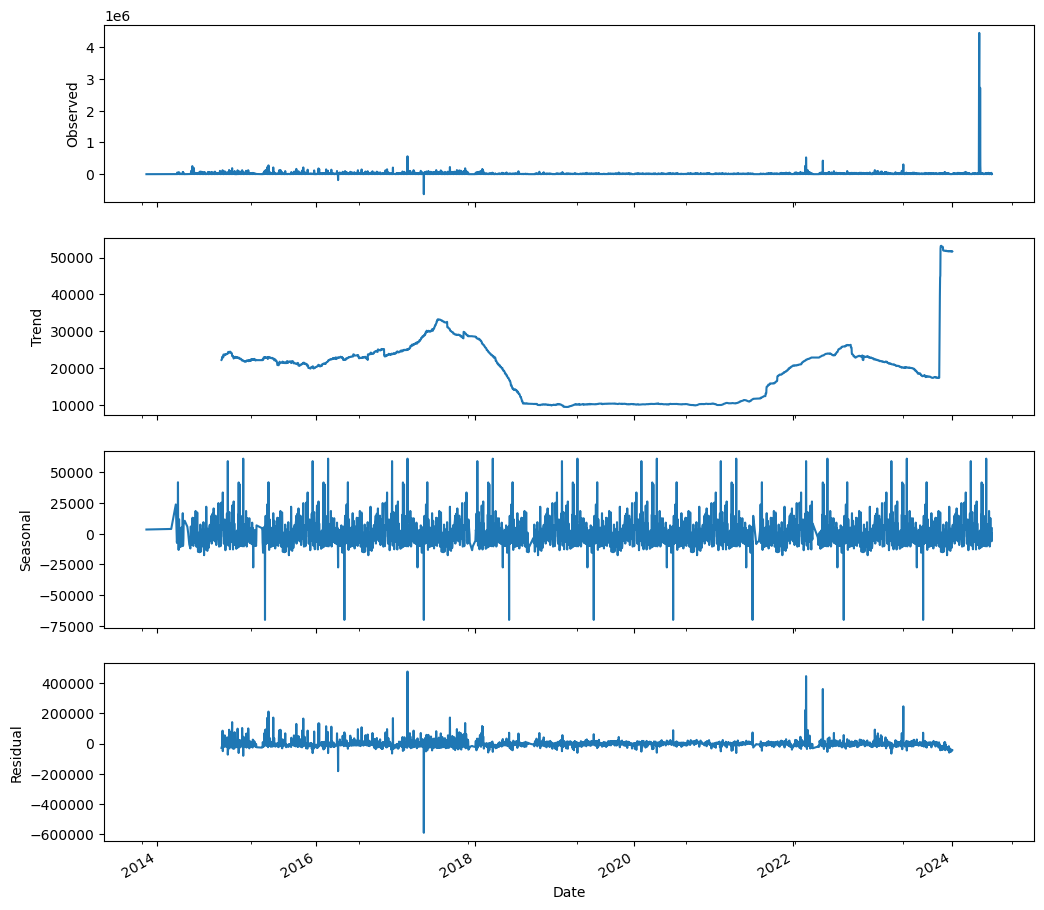

In [17]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure correct data types
Data['TRANS DATE'] = pd.to_datetime(Data['TRANS DATE'])

# Aggregate transaction amounts by date
daily_amounts = Data.groupby('TRANS DATE')['ORIGINAL GROSS AMT'].sum().reset_index()

# Set the date column as the index
daily_amounts.set_index('TRANS DATE', inplace=True)

# Perform seasonal decomposition (assuming a daily periodicity of 365 days for yearly seasonality)
decomposition = seasonal_decompose(daily_amounts['ORIGINAL GROSS AMT'], model='additive', period=365)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.show()


# Machine Learning Algorithms

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Ensure correct data types
Data['TRANS DATE'] = pd.to_datetime(Data['TRANS DATE'])

# Select relevant features for clustering
features = Data[['ORIGINAL GROSS AMT', 'Month', 'Day']]

# Fill any remaining missing values (if any)
features.fillna(0, inplace=True)

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Display the first few rows to verify
print(features.head())


   ORIGINAL GROSS AMT  Month  Day
0               72.61      1    3
1               85.51      1   24
2               10.09      2    1
3               20.00      1    4
4               50.00      1    5


C:\Users\macke\AppData\Local\Temp\ipykernel_20680\481288029.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0, inplace=True)


In [19]:
from sklearn.cluster import KMeans

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels to the original DataFrame
Data['Cluster'] = clusters

# Display the first few rows with cluster labels
print(Data.head())


  TRANS DATE TRANS VAT DESC  ORIGINAL GROSS AMT ORIGINAL CUR  \
0 2017-01-03             VR               72.61          GBP   
1 2017-01-24             VR               85.51          GBP   
2 2017-02-01             VR               10.09          GBP   
3 2017-01-04             VR               20.00          GBP   
4 2017-01-05             VR               50.00          GBP   

   BILLING GROSS AMT BILLING CUR CODE  TRANS TAX AMT       MERCHANT NAME  \
0              72.61              GBP            0.0     shell kings 587   
1              85.51              GBP            0.0  shell fiveways 387   
2              10.09              GBP            0.0  shell fiveways 387   
3              20.00              GBP            0.0  mibsons service st   
4              50.00              GBP            0.0  malthurst petroleu   

        CARD NUMBER TRANS CAC CODE 1 TRANS CAC DESC 1 TRANS CAC CODE 2  \
0  ************5770             K020     Vehicle Fuel            RV12N   
1  *******

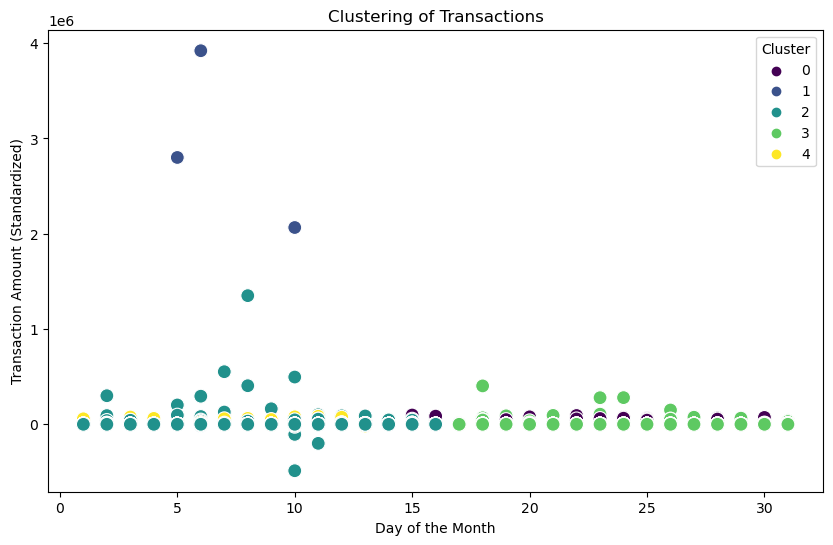

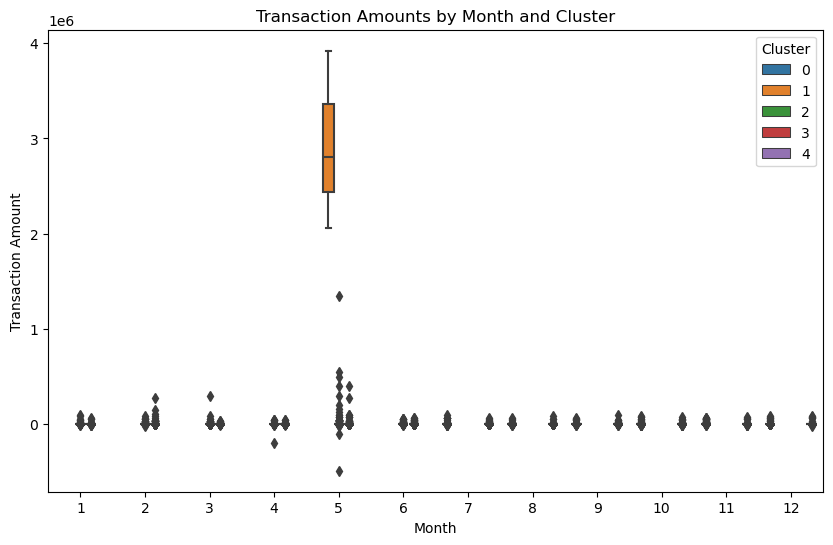

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data, x='Day', y='ORIGINAL GROSS AMT', hue='Cluster', palette='viridis', s=100)
plt.title('Clustering of Transactions')
plt.xlabel('Day of the Month')
plt.ylabel('Transaction Amount (Standardized)')
plt.legend(title='Cluster')
plt.show()

# Additional plot: Amount vs Month
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data, x='Month', y='ORIGINAL GROSS AMT', hue='Cluster')
plt.title('Transaction Amounts by Month and Cluster')
plt.xlabel('Month')
plt.ylabel('Transaction Amount')
plt.show()


In [21]:
# Calculate summary statistics for each cluster
cluster_summary = Data.groupby('Cluster').agg({
    'ORIGINAL GROSS AMT': ['mean', 'median', 'std', 'min', 'max'],
    'Month': ['mean', 'median', 'std'],
    'Day': ['mean', 'median', 'std']
}).reset_index()

cluster_summary.columns = ['Cluster', 'Mean Amount', 'Median Amount', 'Std Amount', 'Min Amount', 'Max Amount',
                           'Mean Month', 'Median Month', 'Std Month', 'Mean Day', 'Median Day', 'Std Day']

print(cluster_summary)


   Cluster   Mean Amount  Median Amount     Std Amount  Min Amount  \
0        0  1.555229e+02          43.91    1294.335116    -3601.50   
1        1  2.928324e+06     2799984.00  934141.716623  2064988.00   
2        2  1.721537e+02          43.97    5021.748571  -486980.09   
3        3  1.526942e+02          42.95    2103.802724    -4344.00   
4        4  1.354079e+02          42.38    1045.472985   -16992.30   

   Max Amount  Mean Month  Median Month  Std Month   Mean Day  Median Day  \
0    97538.78    9.497860          10.0   1.573228  21.875695        21.0   
1  3920000.00    5.000000           5.0   0.000000   7.000000         6.0   
2  1350000.00    3.584397           3.0   1.787814   8.903624         9.0   
3   403000.00    3.615788           4.0   1.879219  23.398807        23.0   
4    98527.00    9.644690          10.0   1.751589   7.751685         8.0   

    Std Day  
0  4.725741  
1  2.645751  
2  4.411029  
3  4.086063  
4  3.935138  


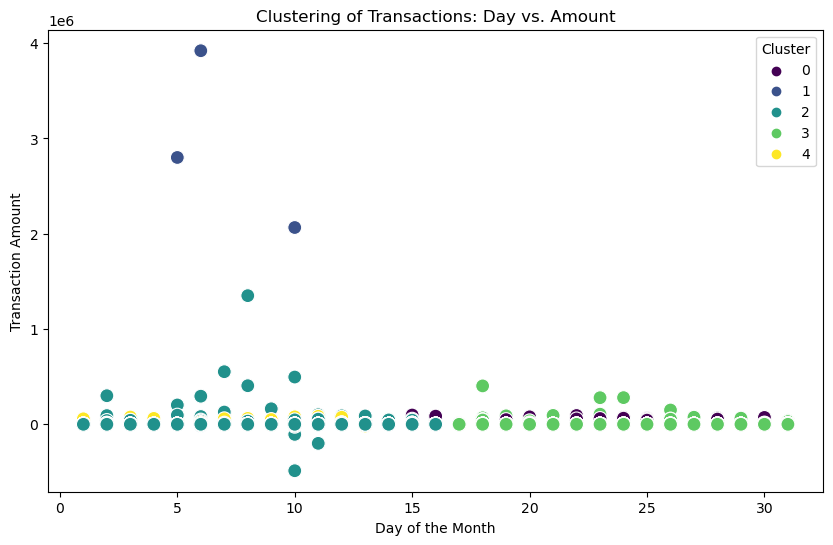

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the clusters: Day vs. Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data, x='Day', y='ORIGINAL GROSS AMT', hue='Cluster', palette='viridis', s=100)
plt.title('Clustering of Transactions: Day vs. Amount')
plt.xlabel('Day of the Month')
plt.ylabel('Transaction Amount')
plt.legend(title='Cluster')
plt.show()


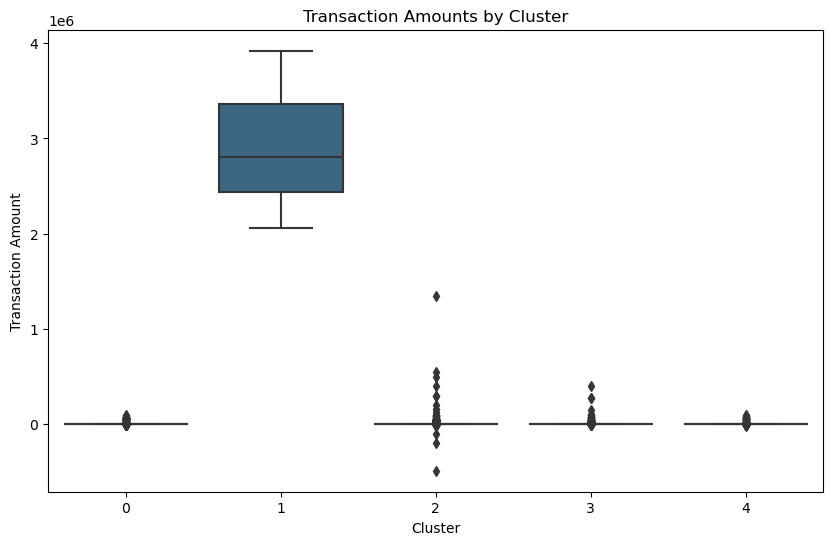

In [23]:
# Box plot: Amount by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data, x='Cluster', y='ORIGINAL GROSS AMT', palette='viridis')
plt.title('Transaction Amounts by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Transaction Amount')
plt.show()


C:\Users\macke\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


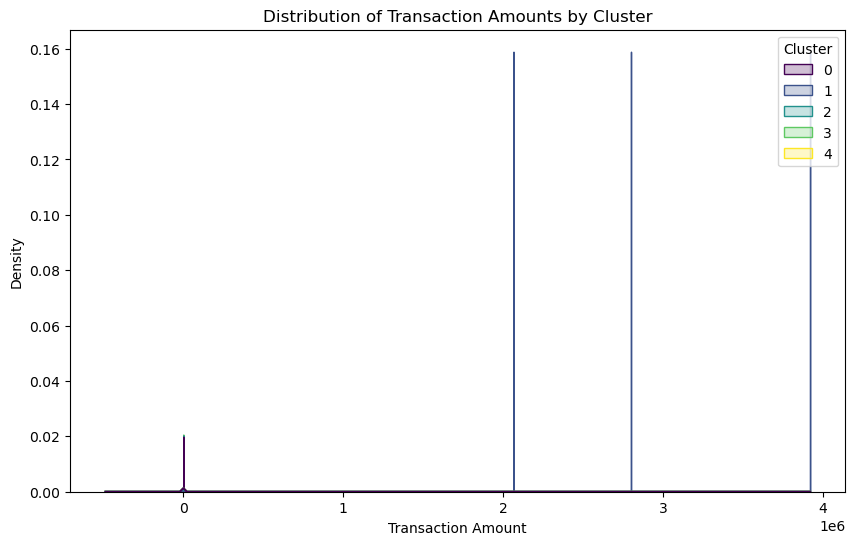

In [24]:
# Distribution plot: Amount by Cluster
plt.figure(figsize=(10, 6))
sns.histplot(data=Data, x='ORIGINAL GROSS AMT', hue='Cluster', kde=True, palette='viridis', element='step', stat='density', common_norm=False)
plt.title('Distribution of Transaction Amounts by Cluster')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()


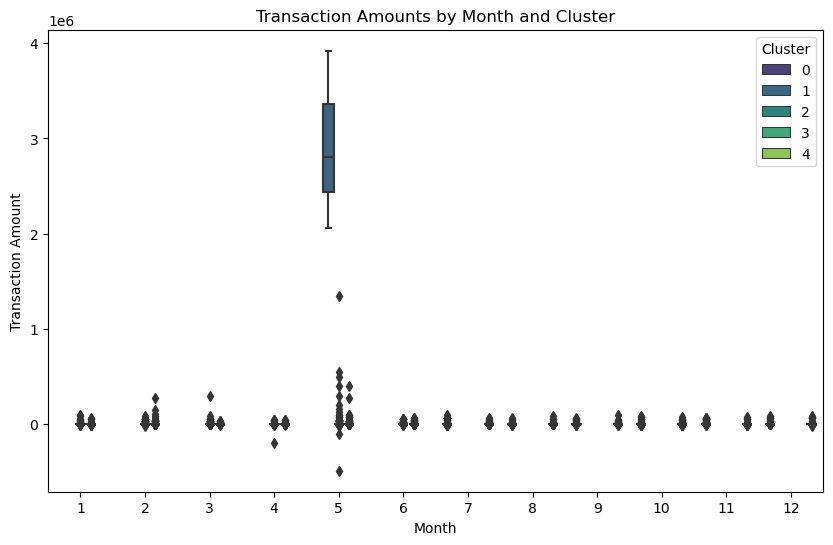

In [25]:
# Box plot: Amount by Month and Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data, x='Month', y='ORIGINAL GROSS AMT', hue='Cluster', palette='viridis')
plt.title('Transaction Amounts by Month and Cluster')
plt.xlabel('Month')
plt.ylabel('Transaction Amount')
plt.show()


In [26]:
# Aggregate transaction amounts by year
yearly_data = Data.groupby('Year')['ORIGINAL GROSS AMT'].sum().reset_index()
print(yearly_data)


    Year  ORIGINAL GROSS AMT
0   2013             -594.00
1   2014          5601992.21
2   2015          7245474.39
3   2016          8532602.26
4   2017         10469341.41
5   2018          4941113.97
6   2019          3690987.70
7   2020          3724489.81
8   2021          3794113.83
9   2022          8236637.37
10  2023          7275303.45
11  2024         16161839.70


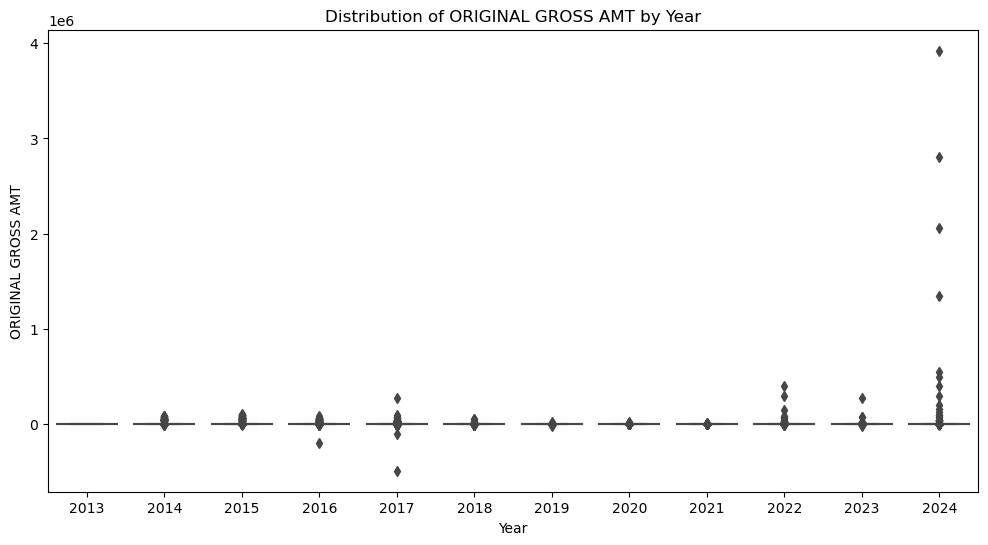

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of transaction amounts by year
plt.figure(figsize=(12, 6))
sns.boxplot(data=Data, x='Year', y='ORIGINAL GROSS AMT')
plt.title('Distribution of ORIGINAL GROSS AMT by Year')
plt.xlabel('Year')
plt.ylabel('ORIGINAL GROSS AMT')
plt.show()


C:\Users\macke\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\macke\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


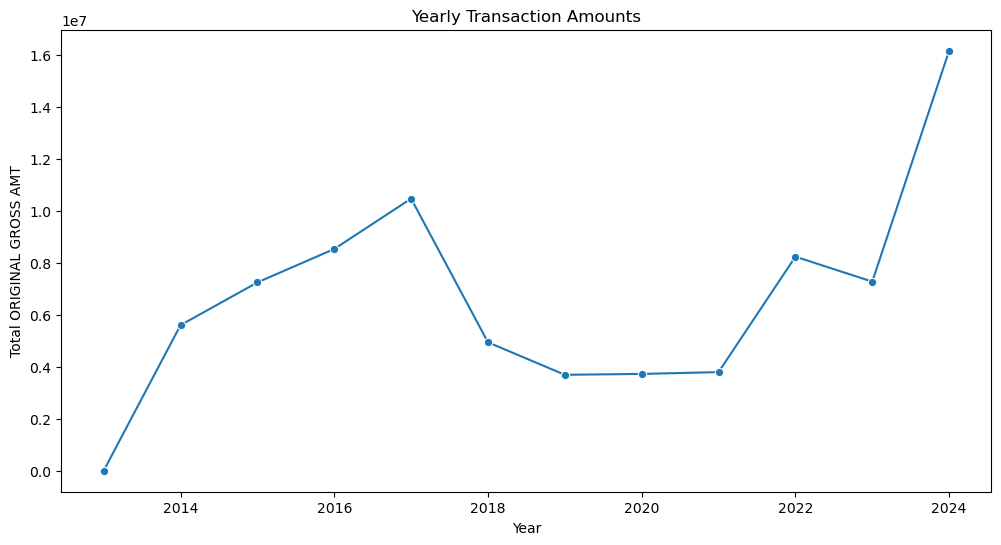

In [28]:
# Line plot of yearly transaction amounts
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x='Year', y='ORIGINAL GROSS AMT', marker='o')
plt.title('Yearly Transaction Amounts')
plt.xlabel('Year')
plt.ylabel('Total ORIGINAL GROSS AMT')
plt.show()


# Hypothesis Design
- Hypothesis: The year 2024 shows significantly higher transaction amounts compared to the previous years.

Function to Test the Hypothesis
- This hypothesis can be tested by comparing the transaction amounts in 2024 with the transaction amounts from the previous years using a t-test.

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

def validate_2024_hypothesis(Data, year_column='Year', amount_column='ORIGINAL GROSS AMT', target_year=2024):
    """
    Validate the hypothesis that the transaction amounts in the year 2024 are significantly higher than the previous years.
    
    Args:
    Data (pd.DataFrame): The dataset containing transaction data.
    year_column (str): The column name representing the year.
    amount_column (str): The column name representing the transaction amount.
    target_year (int): The year to compare against previous years.
    
    Returns:
    float: The p-value of the t-test.
    """
    # Extract transaction amounts for the target year
    target_transactions = Data[Data[year_column] == target_year][amount_column].dropna()
    
    # Extract transaction amounts for previous years
    previous_transactions = Data[Data[year_column] < target_year][amount_column].dropna()
    
    # Ensure there is enough data for the t-test
    if len(target_transactions) == 0 or len(previous_transactions) == 0:
        print("One of the groups has no data.")
        print(f"Size of target transactions group: {len(target_transactions)}")
        print(f"Size of previous transactions group: {len(previous_transactions)}")
        return np.nan
    
    # Perform t-test
    t_stat, p_value = ttest_ind(target_transactions, previous_transactions, equal_var=False)
    
    # Print the result
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    
    # Interpret the p-value
    if p_value < 0.05:
        print("Reject the null hypothesis: The transaction amounts in 2024 are significantly higher than the previous years.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in transaction amounts in 2024 compared to previous years.")
    
    return p_value

p_value = validate_2024_hypothesis(Data, year_column='Year', amount_column='ORIGINAL GROSS AMT', target_year=2024)

T-statistic: 2.366833871000886
P-value: 0.017949723884515045
Reject the null hypothesis: The transaction amounts in 2024 are significantly higher than the previous years.
